In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
# load data set
df = pd.read_csv("data/features.csv")
df = df.iloc[:, 2:]

In [3]:
df.head()

,chroma_stft_mean,rms_mean,bpm,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,mfcc1_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,0.390503,0.190476,92.285156,2240.289987,2193.980956,4728.436605,0.106657,-0.000016,-0.000355,-44.723370,...,8.381841,-15.426938,4.878397,-10.051116,4.564088,-1.991847,7.979235,1.212326,1.365209,hiphop
1,0.500908,0.261586,71.777344,2709.171523,2510.848006,5794.946346,0.124583,-0.000284,-0.002899,-11.706974,...,14.002207,-8.072070,7.428148,-5.495323,12.837337,-3.695439,6.218712,-2.584942,0.102165,hiphop
2,0.427645,0.292688,184.570312,2363.017438,2384.234167,4735.809572,0.105224,0.001348,-0.003059,-27.395569,...,-0.473602,-0.853041,-1.762178,-0.080440,3.510901,0.747590,1.177753,-1.213256,-3.546965,hiphop
3,0.485283,0.120688,123.046875,2669.947536,2396.503479,5526.430800,0.117572,-0.000021,-0.000635,-103.145782,...,17.616529,-0.035863,14.716657,-4.235781,10.654611,-6.327601,1.040412,-1.825620,5.556780,hiphop
4,0.457304,0.203709,135.999178,2095.493684,2241.001468,4581.942544,0.094151,-0.000037,-0.001135,-74.213852,...,6.884745,-15.329198,4.779245,-11.102331,4.739863,-2.809381,6.800127,-5.809848,-3.773828,hiphop


### Feature Correlation heatmap

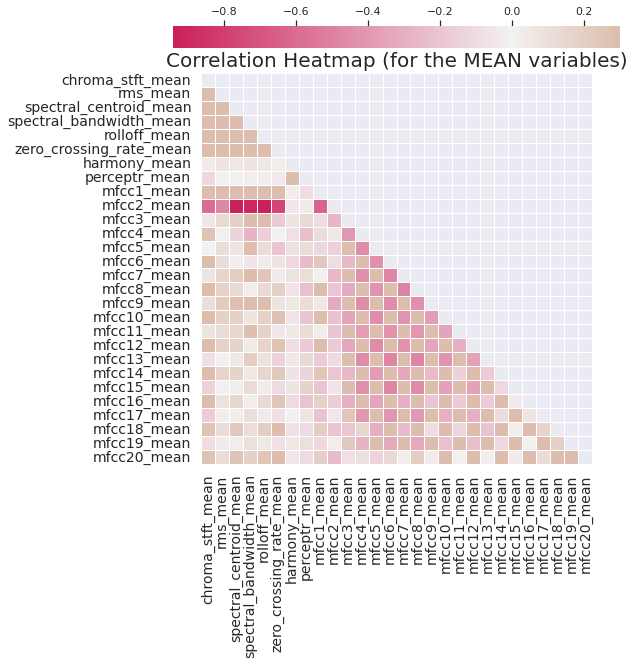

In [21]:
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 9));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
res = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5, "location": "top"})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
ax.set_title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig.savefig("prints/corr_heatmap.png", bbox_inches='tight', dpi=400)

### box plot for genre distributions

/tmp/ipykernel_531/3668137355.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_yticks(), fontsize = 18)


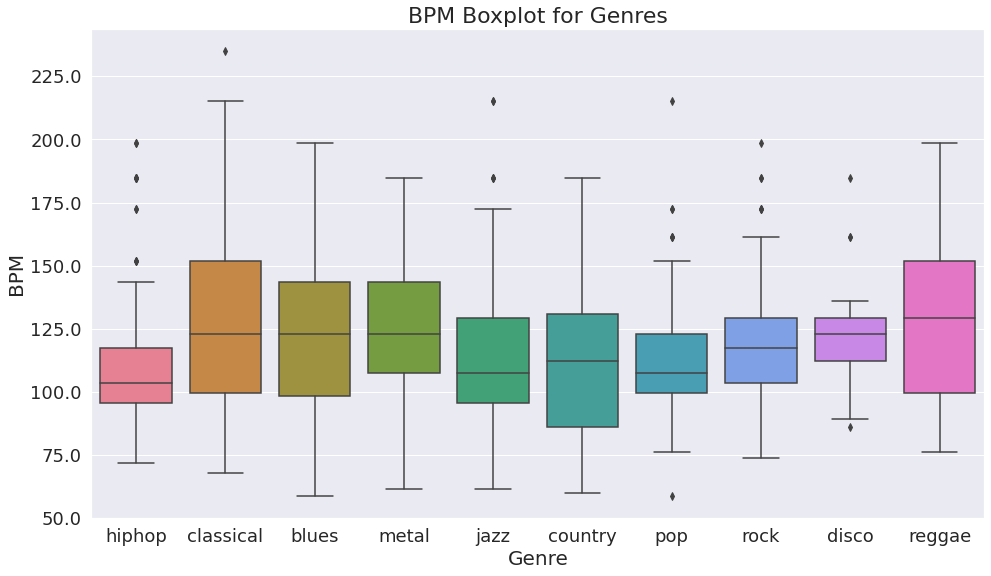

In [33]:
x = df[["label", "bpm"]]

fig, ax = plt.subplots(figsize=(16, 9));
res = sns.boxplot(x = "label", y = "bpm", data = x, palette = 'husl')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_yticks(), fontsize = 18)

ax.set_title('BPM Boxplot for Genres', fontsize = 22)
ax.set_xlabel("Genre", fontsize =20)
ax.set_ylabel("BPM", fontsize = 20)
fig.show()
fig.savefig("prints/bpm_boxplot.png", bbox_inches='tight', dpi=400)

### PCA

In [35]:
from sklearn import preprocessing

df = df.iloc[0:, 1:]
y = df['label']
X = df.loc[:, df.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.31315863, 0.27600916])

/tmp/ipykernel_531/2872939949.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(res.get_xticks(), fontsize = 14)
/tmp/ipykernel_531/2872939949.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(res.get_yticks(), fontsize = 14)


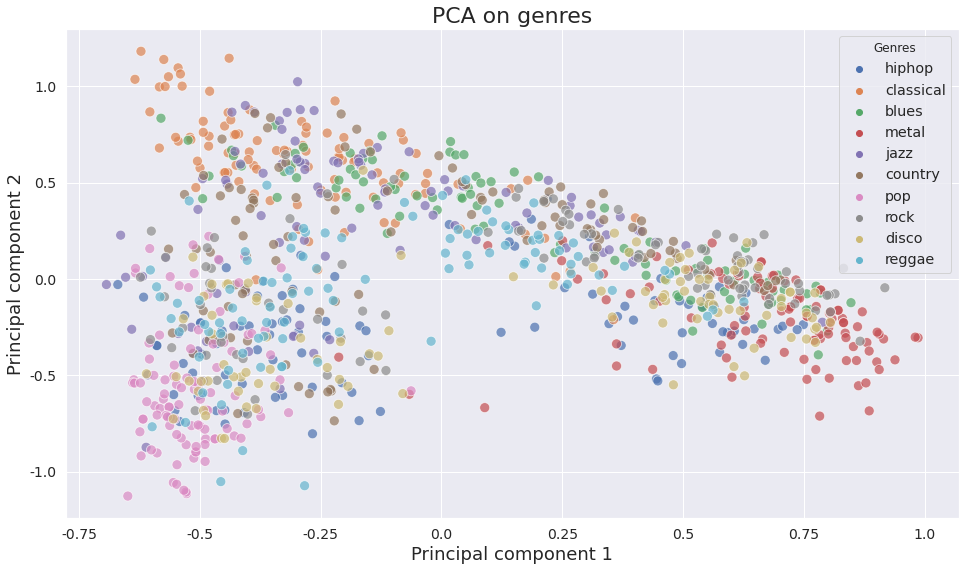

In [57]:
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.scatterplot(
    x="principal component 1",
    y="principal component 2",
    data=finalDf,
    hue="label",
    alpha=0.7,
    s=100,
    legend="full"
)
ax.set_xticklabels(res.get_xticks(), fontsize = 14)
ax.set_yticklabels(res.get_yticks(), fontsize = 14)
ax.legend(title="Genres", loc="upper right", fontsize="large")

ax.tick_params(axis="both", which="minor", labelsize=14)
ax.set_title("PCA on genres", fontsize=22)
ax.set_xlabel("Principal component 1", fontsize=18)
ax.set_ylabel("Principal component 2", fontsize=18)
fig.show()
fig.savefig("prints/pca.png", bbox_inches="tight", dpi=400)


Librosa visualizations

In [29]:
audio_file_path = Path("./data", "genres", "blues", "blues.00000.wav")
y, sr = librosa.load(audio_file_path)

# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

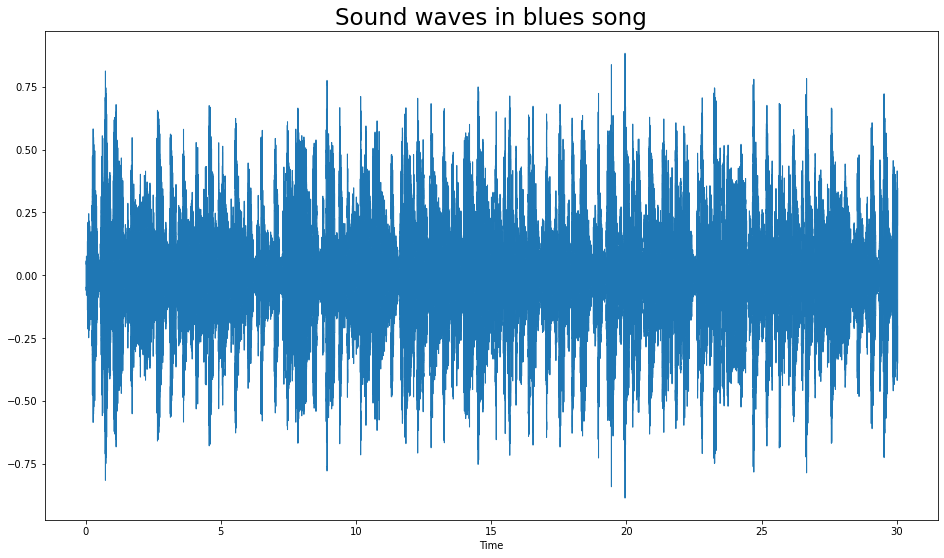

In [32]:
fig, ax = plt.subplots(figsize = (16, 9))
librosa.display.waveshow(y = audio_file, sr = sr)
ax.set_title("Sound waves in blues song", fontsize = 23)
fig.show()